In [6]:
import pandas as pd
import numpy as np

from numpy import NaN,nan,NAN
from pandas import DataFrame

import warnings
warnings.filterwarnings(action='ignore')

In [11]:
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2020'), ('cust_1', '2021'),
                                         ('cust_2', '2020'), ('cust_2', '2021')])  

data = DataFrame(data=np.arange(16).reshape(4, 4),
   index=mul_index,
   columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],
   dtype='int')

data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

# stack

In [16]:
dataStacked = data.stack()
dataStacked

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [28]:
dataStacked['cust_2']['2020'][['prd_1','prd_2']]

datastacked.index

MultiIndex([('cust_1', '2020', 'prd_1'),
            ('cust_1', '2020', 'prd_2'),
            ('cust_1', '2020', 'prd_3'),
            ('cust_1', '2020', 'prd_4'),
            ('cust_1', '2021', 'prd_1'),
            ('cust_1', '2021', 'prd_2'),
            ('cust_1', '2021', 'prd_3'),
            ('cust_1', '2021', 'prd_4'),
            ('cust_2', '2020', 'prd_1'),
            ('cust_2', '2020', 'prd_2'),
            ('cust_2', '2020', 'prd_3'),
            ('cust_2', '2020', 'prd_4'),
            ('cust_2', '2021', 'prd_1'),
            ('cust_2', '2021', 'prd_2'),
            ('cust_2', '2021', 'prd_3'),
            ('cust_2', '2021', 'prd_4')],
           )

In [42]:
data.loc['cust_2','prd_3'] = nan
data.stack(dropna=False)

datastacked.unstack()
datastacked

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [45]:
datastacked.unstack(level=0)  # 0 level이 열 인덱스로
datastacked.unstack(level=1)  # 1 level이 열 인덱스로

# 셋 다 같음
datastacked.unstack(level=2)  # 2 level이 열 인덱스로
datastacked.unstack(level=-1) 
datastacked.unstack()

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

# wide_to_long

In [ ]:
'''
데이터프레임 구조 변경
pivot.pivot_table
melt
stack, unstack
'''

In [62]:
for i,x in zip(range(3), np.random.randn(3)):  # 0 1 2 와 난수 3개가 짝을 이룸
    print(i,x)

0 -2.185788381698759
1 -1.551183623127072
2 -0.6581292079325215


In [65]:
data_wide = pd.DataFrame({
    "C1prd1" : {0 : "a", 1 : "b", 2 : "c"},
   "C1prd2" : {0 : "d", 1 : "e", 2 : "f"},
   "C2prd1" : {0 : 2.5, 1 : 1.2, 2 : .7},
   "C2prd2" : {0 : 3.2, 1 : 1.3, 2 : .1},
   "value" : dict(zip(range(3), np.random.randn(3)))
   })

data_wide

,C1prd1,C1prd2,C2prd1,C2prd2,value
0,a,d,2.5,3.2,-0.229213
1,b,e,1.2,1.3,1.089139
2,c,f,0.7,0.1,0.770354


In [82]:
help(pd.wide_to_long)

Help on function wide_to_long in module pandas.core.reshape.melt:

wide_to_long(df, stubnames, i, j, sep='', suffix='\\d+')
    Wide panel to long format. Less flexible but more user-friendly than melt.
    
    With stubnames ['A', 'B'], this function expects to find one or more
    group of columns with format
    A-suffix1, A-suffix2,..., B-suffix1, B-suffix2,...
    You specify what you want to call this suffix in the resulting long format
    with `j` (for example `j='year'`)
    
    Each row of these wide variables are assumed to be uniquely identified by
    `i` (can be a single column name or a list of column names)
    
    All remaining variables in the data frame are left intact.
    
    Parameters
    ----------
    df : DataFrame
        The wide-format DataFrame
    stubnames : str or list-like
        The stub name(s). The wide format variables are assumed to
        start with the stub names.
    i : str or list-like
        Column(s) to use as id variable(s)
    j : 

In [83]:
data_wide['seq_no']=data_wide.index
pd.wide_to_long(data_wide, ['C1','C2'], i='seq_no', j='prd', suffix='\w+')

,,value,C1,C2
seq_no,prd,,,
0,prd1,-0.229213,a,2.5
1,prd1,1.089139,b,1.2
2,prd1,0.770354,c,0.7
0,prd2,-0.229213,d,3.2
1,prd2,1.089139,e,1.3
2,prd2,0.770354,f,0.1


In [84]:
data = DataFrame({
    'id':['id1','id1','id1','id2','id2','id3'],
    'f1':['a','a','a','b','b','b'],
    'f2':['d','d','d','c','c','b']
})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,b


In [85]:
#            (인덱스,   컬럼)
pd.crosstab(data.f1, data.f2)


f2,b,c,d
f1,,,
a,0,0,3
b,1,2,0


In [141]:
from plotnine import *  # R의 ggplot2를 사용할 수 있게해줌
import missingno as msno  # 누락값 시각화 패키지

In [90]:
# pip install plotnine

train = pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
train.describe()  # 기술통계 요약 출력

# 성별에 따른 생존률 ?
train.groupby('Sex')  # 그룹화 객체 출력
train.groupby('Sex')['Survived'].mean()
train.groupby('Sex')[['Survived']].mean()

# pivot_table 함수로 동일한 결과 출력
train.pivot_table(index='Sex',values='Survived', aggfunc='mean')

train.pivot_table(index=['Sex'])

# 성별로 구분, 생존여부컬럼에 대해 describe
train.groupby('Sex')['Survived'].describe().T

train.pivot_table(index=['Sex','Pclass'],values='Survived', aggfunc='mean')
train.pivot_table('Survived',['Sex','Pclass'])

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [139]:
# train.info()
train['Survived2'] = (train.Sex == 'female') & (train.Age > 0) & (train.Embarked)
# 결측값 수
train.isnull().sum()  
train.isna().sum()
# 각 구성요소의 수
train['Survived2'].value_counts()

train['Survived2'] = train['Survived2'].astype(int)  # bool은 int로 하면 0 or 1
train['Survived2']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: Survived2, Length: 891, dtype: int32

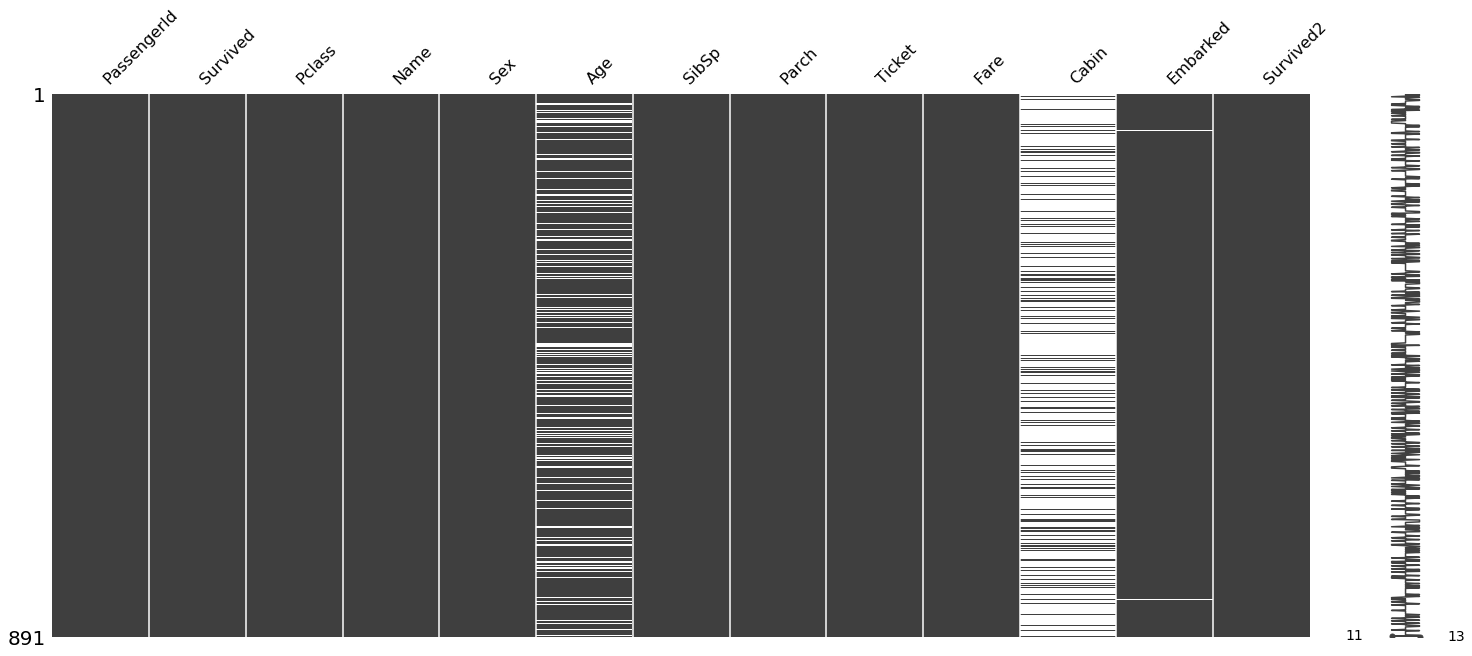

In [145]:
msno.matrix(train)  # 흰색이 결측값

In [150]:
# 그래프에서 한글 깨질 때 해결코드

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

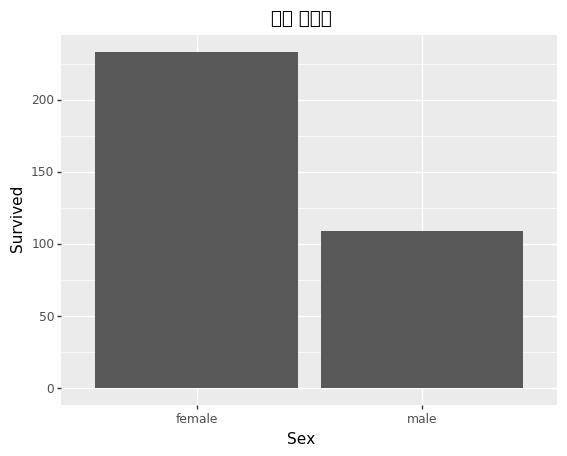

<ggplot: (-9223371836611872316)>

In [151]:
(ggplot(train)
+ aes(x='Sex',y='Survived')
+ geom_col()
+ ggtitle('성별 생존률')
)

# 타이타닉 데이터 분석

In [157]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape  # (891, 12)
test.shape   # (418, 11)

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [162]:
train.describe()
test.describe()

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [172]:
train['Age'].fillna(train['Age'].mean())
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

파생변수 : 원래 있는 변수로 새로 만들어낸 변수

In [185]:
test['Survived'] = (test.Sex == 'female') & (test.Embarked) & (test.Age>0)
test.head()
test.isnull().sum()  # 각 컬럼별 null의 개수
test['Survived'].value_counts()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [187]:
test['Survived']=test['Survived'].astype(int)
test

submission = test[['PassengerId','Survived']]
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [189]:
submission.to_csv('submission.csv', index=False)

In [191]:
# 범주형 데이터 - > 원핫인코딩
# 혈액형 : A, B, A,  AB, O, O
#  A : 1000
#  B : 0100
# AB : 0010
#  O : 0001

train.info()
train.select_dtypes(include='int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [205]:
obj_df = train.select_dtypes(include='object')
obj_df['Name'].isnull().sum()
# obj_df.info()

obj_df[obj_df.isnull().any(axis=1)]  # 열(axis=0), 행(axis=1)에 하나라도 null이 있으면 True
obj_df[obj_df.isnull().any(axis=1)].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S


In [ ]:
obj_df[obj_df.isnull().any(axis=1)]

In [217]:
# 승객 방 번호
obj_df['Cabin'].value_counts()

train.Embarked
train.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [221]:
train[train.Sex == 'male']['Sex'] = 0

In [223]:
train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [228]:
train.loc[train.Sex == 'male','Sex'] = 0
train.loc[train.Sex == 'female','Sex'] = 1

test.loc[test.Sex == 'male','Sex'] = 0
test.loc[test.Sex == 'female','Sex'] = 1
train
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0


In [391]:
# sklearn을 이용해 라벨링

from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train
test

# 1 
le = LabelEncoder()
le.fit(['male','female'])

# dataframe 복사본 만들기
trainCopy = train.copy()
testCopy = test.copy()
trainCopy
testCopy
trainCopy.loc[trainCopy.Sex == 'male','Sex'] = 0
trainCopy.loc[trainCopy.Sex == 'female','Sex'] = 1

testCopy.loc[testCopy.Sex == 'male','Sex'] = 0
testCopy.loc[testCopy.Sex == 'female','Sex'] = 1
testCopy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [263]:
trainCopy['Sex'] = le.transform(trainCopy['Sex'])

In [264]:
testCopy['Sex'] = le.transform(testCopy['Sex'])

In [265]:
trainCopy[['Sex']]
testCopy[['Sex']]

,Sex
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [314]:
# 2
def genToInt(data):
    le = LabelEncoder()
    le.fit(['male','female'])
    data['Sex'] = le.transform(data['Sex'])
    return data
genToInt(train)
genToInt(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [315]:
trainCopy.head()
testCopy.head( )

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [322]:
# Sex (남/여), Pclass(1/2/3), Embarked(C/Q/S)
# 10,  100  100  
# 01,  010  010
#      001  001

dummy_columns = ['Sex','Pclass','Embarked']

def myDummy(data, columns):
    # 각각의 컬럼값을 원핫인코딩 -> 결과 리턴
    # Sex0 Sex1 Pclass1 Pclass2 Pclass3 Embarked_C Embarked_Q Embarked_S
    #  1    0     0       1       0         1         0           0
    for column in columns:
#         print(pd.get_dummies(data[column],prefix=column))
        data = pd.concat([data,pd.get_dummies(data[column],prefix=column)],axis=1)
        data = data.drop(column, axis=1)
    return data    
        
trainDummy = myDummy(trainCopy, dummy_columns)
testDummy = myDummy(testCopy, dummy_columns)

trainDummy
# 원핫인코딩 이전
print(trainCopy.shape)
print(testCopy.shape)

print(trainDummy.shape)
print(testDummy.shape)

trainDummy.head()

trainX=trainDummy.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
trainX

testX=testDummy.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
testX

(891, 12)
(418, 11)
(891, 17)
(418, 16)


,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,1,0,0,0,1,0,1,0
1,47.0,1,0,7.0000,0,1,0,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,0,1,0,0,1
4,22.0,1,1,12.2875,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,1,0,0,0,1,0,0,1
414,39.0,0,0,108.9000,0,1,1,0,0,1,0,0
415,38.5,0,0,7.2500,1,0,0,0,1,0,0,1
416,NaN,0,0,8.0500,1,0,0,0,1,0,0,1


In [525]:
'''
목표 : 등수 올리기
- 조건문 개선
- Name => Age결측값 처리
호칭별 중앙값

- FamilySize 컬럼 추가 (Sibsp + Parch) , binning(L/M/S)
'''

'\n목표 : 등수 올리기\n- 조건문 개선\n- Name => Age결측값 처리\n호칭별 중앙값\n\n- FamilySize 컬럼 추가 (Sibsp + Parch) , binning(L/M/S)\n'

In [526]:
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

# 테스트용 데이터프래임 복사본 생성
trc = tr.copy()
tec = te.copy()

In [527]:
# 불필요한 컬럼 제거
trc = trc.drop(['Ticket','Cabin'],axis=1)
tec = tec.drop(['Ticket','Cabin'],axis=1)

In [528]:
# Name을 호칭으로 변환
trc['Name'] = trc['Name'].str.extract(' ([A-Za-z]+).')
tec['Name'] = tec['Name'].str.extract(' ([A-Za-z]+).')

In [529]:
trc.groupby('Name')['Age'].size()
# # 상위 3개 호칭
# # Mr             502
# # Miss           179
# # Mrs            121
trc.groupby('Name')['Age'].mean()
# # Mr             32
# Miss           21
# Mrs            36

Name
Billiard       40.500000
Capt           70.000000
Carlo          29.000000
Col            58.000000
Cruyssen       47.000000
Don            40.000000
Dr             42.000000
Gordon         48.500000
Impe           25.333333
Jonkheer       38.000000
Major          48.500000
Master          4.574167
Melkebeke            NaN
Messemaeker    36.000000
Miss           21.846154
Mlle           24.000000
Mme            24.000000
Mr             32.389610
Mrs            36.182692
Ms             28.000000
Mulder         30.000000
Pelsmaeker     16.000000
Planke         21.666667
Rev            43.166667
Shawah         30.000000
Steen          28.000000
Velde          33.000000
Walle          28.000000
der            61.000000
the            33.000000
y              20.666667
Name: Age, dtype: float64

In [530]:
# 나이 결측치 제거
trc.loc[(trc['Age'].isnull()) & (trc['Name']=='Mr'),'Age'] = 32
trc.loc[(trc['Age'].isnull()) & (trc['Name']=='Miss'),'Age'] = 21
trc.loc[(trc['Age'].isnull()) & (trc['Name']=='Mrs'),'Age'] = 36

tec.loc[(trc['Age'].isnull()) & (trc['Name']=='Mr'),'Age'] = 32
tec.loc[(trc['Age'].isnull()) & (trc['Name']=='Miss'),'Age'] = 21
tec.loc[(trc['Age'].isnull()) & (trc['Name']=='Mrs'),'Age'] = 36

trc['Age']=trc['Age'].fillna(trc['Age'].mean())
tec['Age']=tec['Age'].fillna(tec['Age'].mean())

In [531]:
# 남자는 1 여자는 0 으로 변환
trc['Sex'] = (trc['Sex']=='male').astype(int)
trc['Sex'].value_counts()  # 577, 314

tec['Sex'] = (tec['Sex']=='male').astype(int)
tec['Sex'].value_counts()  # 266, 152

1    266
0    152
Name: Sex, dtype: int64

In [532]:
# 'SibSp','Parch' 두 개를 합친 FamilySize 컬럼 생성
trc['FamilySize'] = trc['SibSp']+trc['Parch']
tec['FamilySize'] = tec['SibSp']+tec['Parch']

# 'SibSp','Parch' 컬럼 제거
trc = trc.drop(['SibSp','Parch'], axis=1)
tec = tec.drop(['SibSp','Parch'], axis=1)

In [533]:
trc[trc['Survived']==0]['Age'].value_counts()  # 32세가 가장 많이 사망

32.0    113
21.0     33
28.0     18
18.0     17
25.0     17
       ... 
14.5      1
32.5      1
36.5      1
55.5      1
70.5      1
Name: Age, Length: 78, dtype: int64

In [617]:
t = tec.copy()
t

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,892,3,Mr,1,34.50000,7.8292,Q,0
1,893,3,Mrs,0,47.00000,7.0000,S,1
2,894,2,Mr,1,62.00000,9.6875,Q,0
3,895,3,Mr,1,27.00000,8.6625,S,0
4,896,3,Mrs,0,22.00000,12.2875,S,2
...,...,...,...,...,...,...,...,...
413,1305,3,Mr,1,30.27259,8.0500,S,0
414,1306,1,y,0,39.00000,108.9000,C,0
415,1307,3,Mr,1,38.50000,7.2500,S,0
416,1308,3,Mr,1,30.27259,8.0500,S,0


In [616]:
( (t.Pclass==3) | (t.Sex==0) & (t.Pclass >=2) | ((t.Sex==1) & (t.Age<13) & (t.Age>50))).value_counts()

True     248
False    170
dtype: int64

In [618]:
# 다양한 조건식

# t['Survived'] = (t.Sex == 0) & (test.Embarked) & (test.Age>0)                                        # 0.78468
# t['Survived'] = (t['Sex']==0) & (t['Pclass']>=1) & (t['Age']!=32.0)                                  # 0.76555
# t['Survived'] = (t.Sex==0) & (t.Pclass>=1) & (t.Age<=55)& (t.Age>=9)                                 # 0.75598
# t['Survived'] = ((t.Sex==0) & (t.Pclass>=1)) | ((t.Sex==1) & (t.Age<13) & (t.Age>70))                # 0.76555
# t['Survived'] = (t.Pclass==3) | (t.Sex==0) & (t.Pclass >=2) | ((t.Sex==1) & (t.Age<13) & (t.Age>50)) # 0.45454

# csv파일 생성
t['Survived'] = t['Survived'].astype(int)
sub=t[['PassengerId','Survived']]
sub.to_csv('sub2.csv',index=False)

sub['Survived'].value_counts()

1    248
0    170
Name: Survived, dtype: int64

0    266
1    152
Name: Survived, dtype: int64

In [486]:
def my_chart(feature):

    survived=trc[trc['Survived']==1][feature].value_counts()
    dead=trc[trc['Survived']==0][feature].value_counts()
    df = DataFrame([survived,dead],index=['survived','dead'])
    df.plot(kind='bar', stacked=False, figsize=(10,5))
    

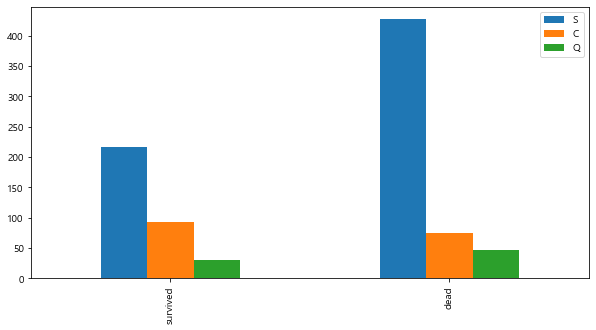

In [541]:
my_chart('Embarked')

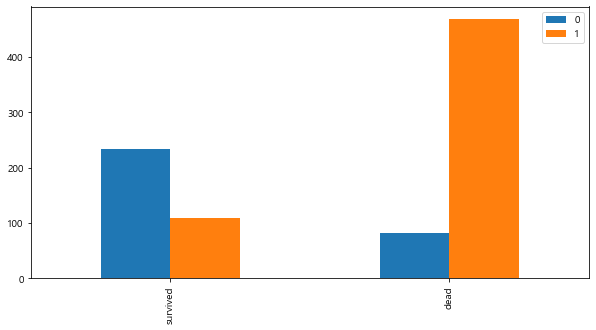

In [487]:
my_chart('Sex')

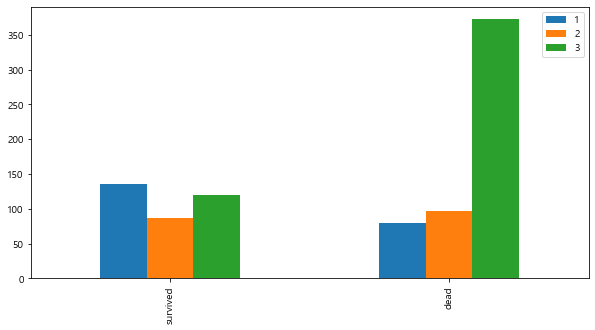

In [488]:
my_chart('Pclass')

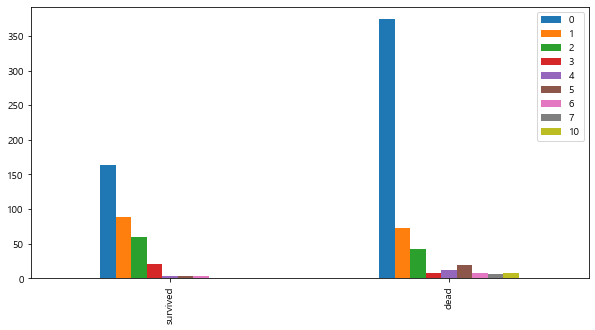

In [489]:
my_chart('FamilySize')

In [491]:
# my_chart('Fare')

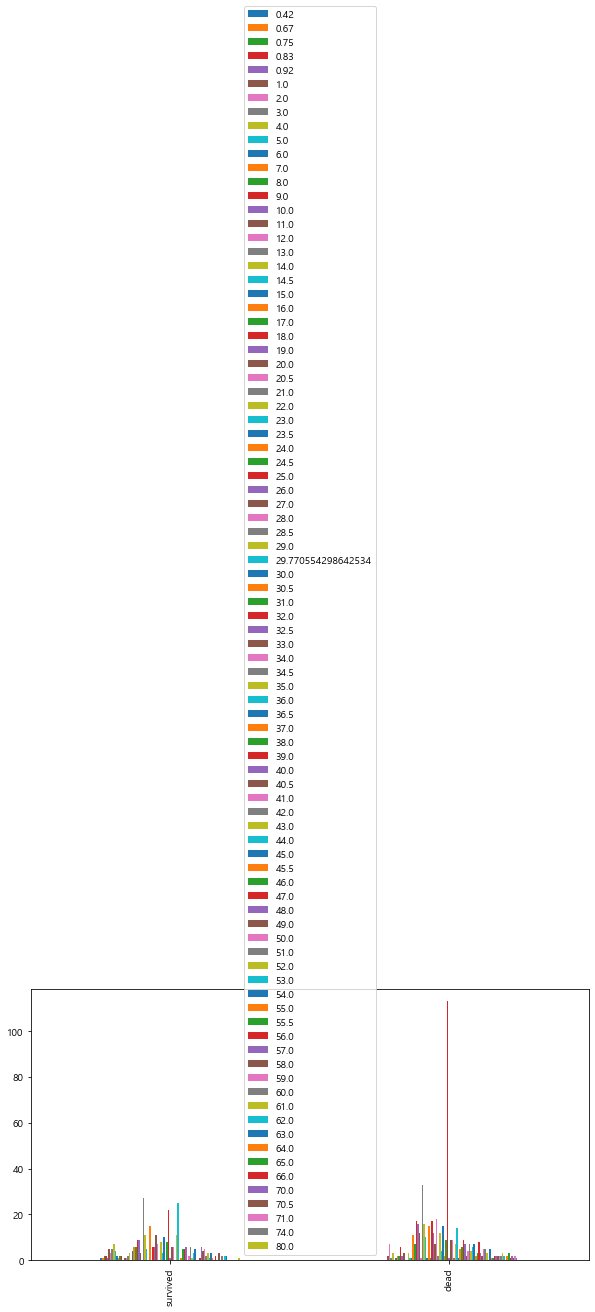

In [492]:
my_chart('Age')